<a href="https://colab.research.google.com/github/Abhi311509/Rice-Leaf-Detection/blob/main/CNN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

In [2]:
labels = ['Bacterial Leaf Blight','Leaf Smut','Brown Spot']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [3]:
train = get_data('/content/drive/MyDrive/Internships/PRCP-1001-RiceLeaf/data2/train')
test = get_data('/content/drive/MyDrive/Internships/PRCP-1001-RiceLeaf/data2/test')

<ipython-input-2-d2a4778cec1a>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [4]:
x_train = []
y_train = []
x_test = []
y_test = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in test:
  x_test.append(feature)
  y_test.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_test = np.array(x_test) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [46]:
x_train.shape

(105, 224, 224, 3)

In [47]:
y_train.shape

(105,)

In [49]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [48]:
y_test.shape

(14,)

In [5]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [32]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(3, activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 28, 28, 64)      

In [33]:
opt = Adam(learning_rate=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [34]:
#history = model.fit(x_train,y_train,epochs = 10 , validation_data = (x_val, y_val))


from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, save_best_only=True)

hist = model.fit(x_train, y_train, batch_size=32, epochs=150,
          validation_data=(x_test, y_test), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Epoch 1/150


/usr/local/lib/python3.8/dist-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(



Epoch 1: val_loss improved from inf to 1.12182, saving model to model.weights.best.hdf5
4/4 - 18s - loss: 1.1107 - accuracy: 0.3429 - val_loss: 1.1218 - val_accuracy: 0.2857 - 18s/epoch - 5s/step
Epoch 2/150

Epoch 2: val_loss improved from 1.12182 to 1.12122, saving model to model.weights.best.hdf5
4/4 - 11s - loss: 1.0955 - accuracy: 0.3333 - val_loss: 1.1212 - val_accuracy: 0.2857 - 11s/epoch - 3s/step
Epoch 3/150

Epoch 3: val_loss improved from 1.12122 to 1.12071, saving model to model.weights.best.hdf5
4/4 - 10s - loss: 1.1089 - accuracy: 0.3619 - val_loss: 1.1207 - val_accuracy: 0.2143 - 10s/epoch - 3s/step
Epoch 4/150

Epoch 4: val_loss improved from 1.12071 to 1.12027, saving model to model.weights.best.hdf5
4/4 - 8s - loss: 1.1164 - accuracy: 0.3143 - val_loss: 1.1203 - val_accuracy: 0.0714 - 8s/epoch - 2s/step
Epoch 5/150

Epoch 5: val_loss improved from 1.12027 to 1.11939, saving model to model.weights.best.hdf5
4/4 - 10s - loss: 1.1020 - accuracy: 0.3143 - val_loss: 1.119

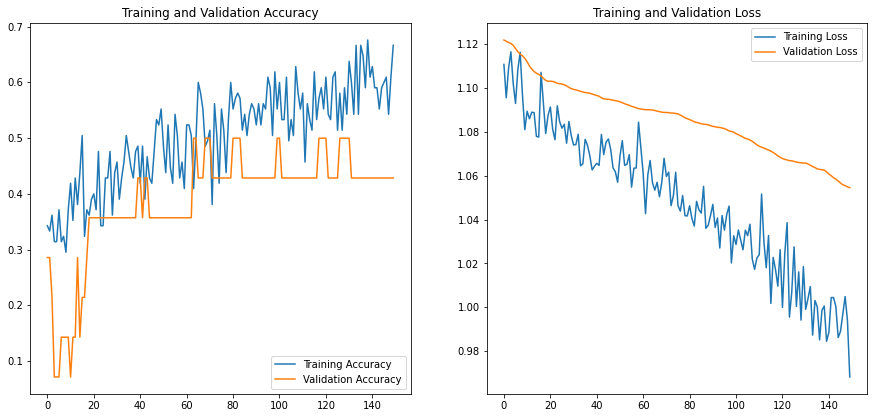

In [35]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs_range = range(150)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [36]:
model.load_weights('model.weights.best.hdf5')

In [37]:
# get predictions on the test set
y_hat = model.predict(x_test)

labels = ['Bacterial Leaf Blight','Leaf Smut','Brown Spot']

1/1 [==============================] - 0s 376ms/step


In [38]:
X_new = x_test
y_new = y_test
y_proba = model.predict(X_new)
y_proba
y_proba.round(2)

1/1 [==============================] - 0s 299ms/step


array([[0.36, 0.27, 0.37],
       [0.42, 0.3 , 0.28],
       [0.36, 0.32, 0.32],
       [0.32, 0.42, 0.27],
       [0.43, 0.26, 0.32],
       [0.4 , 0.3 , 0.31],
       [0.27, 0.43, 0.31],
       [0.41, 0.25, 0.34],
       [0.4 , 0.33, 0.27],
       [0.35, 0.36, 0.29],
       [0.23, 0.46, 0.31],
       [0.27, 0.34, 0.39],
       [0.26, 0.34, 0.4 ],
       [0.29, 0.36, 0.36]], dtype=float32)

In [39]:
y_pred = np.argmax(y_proba, axis=-1)
y_pred, y_new

(array([2, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 2, 2, 1]),
 array([0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2]))

In [40]:
import tensorflow as tf
from tensorflow.keras.utils import img_to_array
img = tf.keras.utils.load_img("/content/leaf smut typical sym (1).jpg", target_size=(224,224,3)
)
img_array = img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = predictions
score1=np.argmax(score, axis=-1)
score1

1/1 [==============================] - 0s 45ms/step


array([2])

In [81]:
import cv2
import os

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [82]:
images1=load_images_from_folder("/content/drive/MyDrive/Internships/PRCP-1001-RiceLeaf/data2/train/Bacterial Leaf Blight")
images2=load_images_from_folder("/content/drive/MyDrive/Internships/PRCP-1001-RiceLeaf/data2/train/Brown Spot")
images3=load_images_from_folder("/content/drive/MyDrive/Internships/PRCP-1001-RiceLeaf/data2/train/Leaf Smut")

In [84]:
a=[images1,images2,images3]

IndexError: ignored

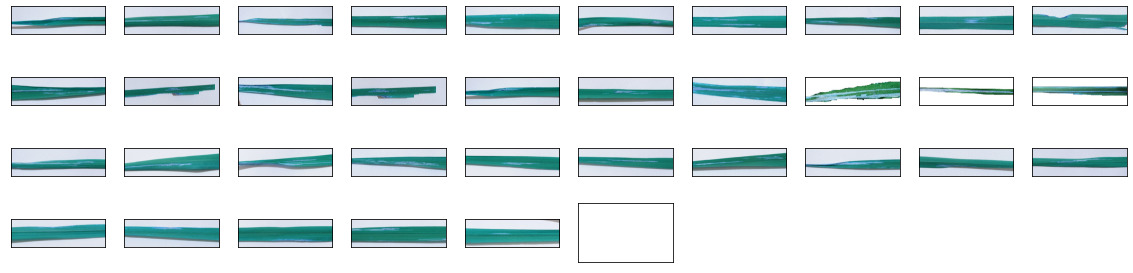

In [85]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


for j in a:
  fig = plt.figure(figsize=(20,5))
  for i in range(40):
    ax = fig.add_subplot(4, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(j[i])

In [78]:
Rice_labels= ['Bacterial Leaf Blight','Leaf Smut','Brown Spot']

TypeError: ignored

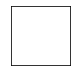

In [80]:
for j in Rice_labels:
  fig = plt.figure(figsize=(20,5))
  for i in range(40):
    ax = fig.add_subplot(4, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(j[i])

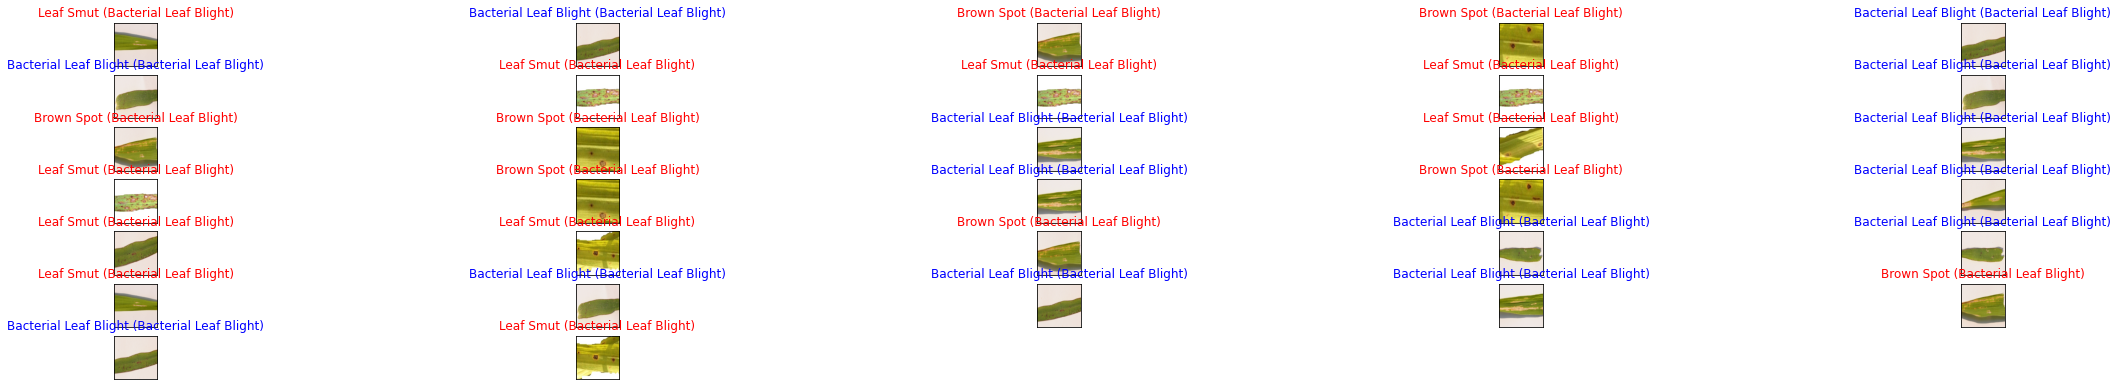

In [79]:
fig = plt.figure(figsize=(40, 20))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32)):
    ax = fig.add_subplot(21, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(x_test[idx])
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(Rice_labels[pred_idx], Rice_labels[true_idx]),
                 color=("blue" if pred_idx == true_idx else "red"))

In [43]:
# evaluate test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 42.8571%


In [50]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.metrics import categorical_accuracy

from tensorflow.keras.callbacks import (EarlyStopping, ReduceLROnPlateau, 
                                        ModelCheckpoint, CSVLogger, LearningRateScheduler)

In [51]:
from tensorflow.keras.applications.mobilenet import MobileNet

model = MobileNet(weights='imagenet')

# Exclude the last 2 layers of the above model.
x = model.layers[-2].output

# Create a new dense layer for predictions
# 3 corresponds to the number of classes
predictions = Dense(3, activation='softmax')(x)

# inputs=model.input selects the input layer, outputs=predictions refers to the
# dense layer we created above.

model = Model(inputs=model.input, outputs=predictions)

model.summary()

17225924/17225924 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128    